In [81]:
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
train_bene_df = pd.read_csv("../data/raw/train_beneficiary.csv")
train_ip_df = pd.read_csv("../data/raw/train_Inpatient.csv")
train_op_df = pd.read_csv("../data/raw/train_outpatient.csv")
train_tgt_lbls_df = pd.read_csv("../data/raw/train.csv")

### Exploring target labels data

In [3]:
train_tgt_lbls_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [4]:
train_tgt_lbls_df['PotentialFraud'].value_counts()

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64

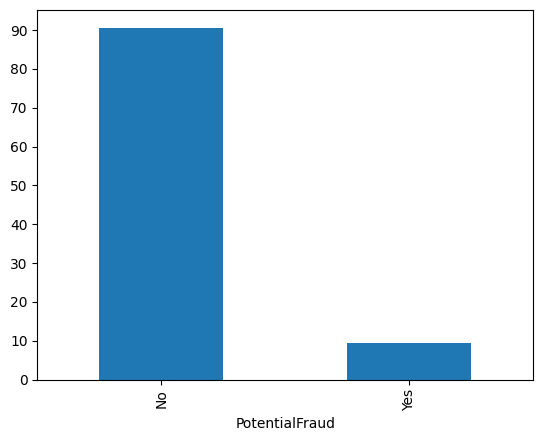

In [9]:
fig = (train_tgt_lbls_df['PotentialFraud'].value_counts(normalize=True)*100).plot(kind='bar')
plt.yticks(np.arange(0,100,10))
plt.plot();


- #### 90% Providers are non-fraudsters

### 1. Adding new feature: 'Admitted?'

In [10]:
train_ip_df['Admitted?'] = 1
train_op_df['Admitted?'] = 0


- #### Merging IP & OP dataframe

In [11]:
common_cols = [col for col in train_ip_df.columns if col in train_op_df.columns]
len(common_cols)

28

In [12]:
# Merging the IP and OP dataset on the basis of common columns
train_ip_op_df = pd.merge(left=train_ip_df, right=train_op_df, left_on=common_cols, right_on=common_cols, how="outer")
train_ip_op_df.shape

(558211, 31)

In [13]:
train_ip_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,NaN,...,V1251,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


- #### Merging IP_OP with Bene dataframe

In [14]:
# Joining the IP_OP dataset with the BENE data
train_ip_op_bene_df = pd.merge(left=train_ip_op_df, right=train_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_df.shape

(558211, 55)

- #### Merging IP_OP_Bene with Provider level target lables dataframe

In [15]:
# Joining the IP_OP_BENE dataset with the Tgt Label Provider Data
train_iobp_df = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
train_iobp_df.shape

(558211, 56)

In [16]:
train_iobp_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,NaN,...,2,1,2,2,2,0,0,120,30,Yes
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaN,...,2,1,2,2,2,0,0,120,30,Yes
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,NaN,...,2,1,1,2,1,0,0,2530,540,No
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,NaN,...,2,1,1,2,1,0,0,2530,540,Yes
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,NaN,...,2,1,1,2,1,0,0,2530,540,No


In [17]:
train_iobp_df.Provider.nunique()

5410

In [18]:
train_iobp_df.ClaimID.nunique()

558211

In [19]:
# Joining with the PRV Tgt Labels
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=train_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,No
1,PRV51003,132,Yes
2,PRV51004,149,No
3,PRV51005,1165,Yes
4,PRV51007,72,No
...,...,...,...
5405,PRV57759,28,No
5406,PRV57760,22,No
5407,PRV57761,82,No
5408,PRV57762,1,No


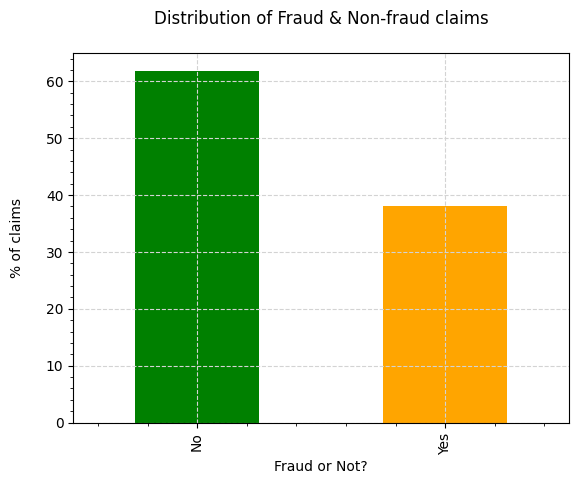

In [22]:
fig = (train_iobp_df['PotentialFraud'].value_counts(normalize=True)*100).plot(kind='bar', color=['green','orange'])

plt.xlabel("Fraud or Not?")
plt.ylabel("% of claims\n")
plt.grid(which='major', linestyle="--", color='lightgrey')
plt.minorticks_on()
plt.title("Distribution of Fraud & Non-fraud claims\n")
plt.plot();

- #### By looking at Claim level it does not seem to be a major class-imbalance problem compared to when we were looking at provider level

### 2. Adding new feature: "Is_Alive?"

##### Is_Alive? = No if date of death is NA else Yes

In [23]:
train_iobp_df['DOB'] = pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d")
train_iobp_df['DOD'] = pd.to_datetime(train_iobp_df['DOD'], format="%Y-%m-%d")

In [24]:
train_iobp_df['Is_Alive?'] = train_iobp_df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

In [25]:
train_iobp_df['Is_Alive?'].value_counts()

Is_Alive?
No     554080
Yes      4131
Name: count, dtype: int64

### 3. Adding new feature: "Claim_Duration"

##### Claim_Duration = claim end date - claim start date

In [26]:
train_iobp_df['ClaimStartDt'] = pd.to_datetime(train_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
train_iobp_df['ClaimEndDt'] = pd.to_datetime(train_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

train_iobp_df['Claim_Duration'] = (train_iobp_df['ClaimEndDt'] - train_iobp_df['ClaimStartDt']).dt.days

### 4. Adding new feature "Admitted_Duration"

##### Admitted_Duration = Discharge date - Admission date

In [27]:
train_iobp_df['AdmissionDt'] = pd.to_datetime(train_iobp_df['AdmissionDt'], format="%Y-%m-%d")
train_iobp_df['DischargeDt'] = pd.to_datetime(train_iobp_df['DischargeDt'], format="%Y-%m-%d")

train_iobp_df['Admitted_Duration'] = (train_iobp_df['DischargeDt'] - train_iobp_df['AdmissionDt']).dt.days

### 5. Adding new feature: "Bene_Age"

##### Bene_Age = date of death - death of birth

In [28]:
# Filling the Null values as MAX Date of Death in the Dataset
train_iobp_df['DOD'].fillna(value=train_iobp_df['DOD'].max(), inplace=True)

C:\Users\Koushik\AppData\Local\Temp\ipykernel_8136\1545225660.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_iobp_df['DOD'].fillna(value=train_iobp_df['DOD'].max(), inplace=True)


In [29]:
train_iobp_df['Bene_Age'] = round(((train_iobp_df['DOD'] - train_iobp_df['DOB']).dt.days)/365,1)

### Adding new feature: "Att_Opr_Oth_Phy_Tot_Claims"

##### Reprents the total claims submitted by Attending, Operating and Other Physicians

In [31]:
# Total unique number of Attended Physicians
train_iobp_df['AttendingPhysician'].nunique()

82063

In [32]:
train_iobp_df['Att_Phy_tot_claims'] = train_iobp_df.groupby(['AttendingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Att_Phy_tot_claims'].describe()

count    556703.000000
mean        138.634829
std         293.669039
min           1.000000
25%           7.000000
50%          33.000000
75%         116.000000
max        2534.000000
Name: Att_Phy_tot_claims, dtype: float64

In [33]:
# Total unique number of Operating Physicians
train_iobp_df['OperatingPhysician'].nunique()

35315

In [34]:
train_iobp_df['Opr_Phy_tot_claims'] = train_iobp_df.groupby(['OperatingPhysician'])['ClaimID'].transform('count')
train_iobp_df['Opr_Phy_tot_claims'].describe()

count    114447.000000
mean         27.204811
std          52.687759
min           1.000000
25%           2.000000
50%           8.000000
75%          25.000000
max         424.000000
Name: Opr_Phy_tot_claims, dtype: float64

In [35]:
# Total unique number of Other Physicians
train_iobp_df['OtherPhysician'].nunique()

46457

In [36]:
train_iobp_df['Oth_Phy_tot_claims'] = train_iobp_df.groupby(['OtherPhysician'])['ClaimID'].transform('count')
train_iobp_df['Oth_Phy_tot_claims'].describe()

count    199736.000000
mean         90.207914
std         208.017235
min           1.000000
25%           3.000000
50%          15.000000
75%          60.000000
max        1247.000000
Name: Oth_Phy_tot_claims, dtype: float64

In [37]:
# Creating the combined feature
train_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Opr_Phy_tot_claims'].fillna(value=0, inplace=True)
train_iobp_df['Oth_Phy_tot_claims'].fillna(value=0, inplace=True)

C:\Users\Koushik\AppData\Local\Temp\ipykernel_8136\4095311399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_iobp_df['Att_Phy_tot_claims'].fillna(value=0, inplace=True)
C:\Users\Koushik\AppData\Local\Temp\ipykernel_8136\4095311399.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [38]:
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'] = train_iobp_df['Att_Phy_tot_claims'] + train_iobp_df['Opr_Phy_tot_claims'] + train_iobp_df['Oth_Phy_tot_claims']

In [39]:
train_iobp_df['Att_Opr_Oth_Phy_Tot_Claims'].describe()

count    558211.000000
mean        176.115666
std         379.833208
min           0.000000
25%           9.000000
50%          41.000000
75%         144.000000
max        3372.000000
Name: Att_Opr_Oth_Phy_Tot_Claims, dtype: float64

In [40]:
train_iobp_df.drop(['Att_Phy_tot_claims', 'Opr_Phy_tot_claims', 'Oth_Phy_tot_claims'], axis=1, inplace=True)

### 7. Adding new feature: "Prv_Tot_Att_Opr_Oth_Phys

##### Represents total physicians that a provider has worked with

In [41]:
train_iobp_df["Prv_Tot_Att_Phy"] = train_iobp_df.groupby(['Provider'])['AttendingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Opr_Phy"] = train_iobp_df.groupby(['Provider'])['OperatingPhysician'].transform('count')
train_iobp_df["Prv_Tot_Oth_Phy"] = train_iobp_df.groupby(['Provider'])['OtherPhysician'].transform('count')

In [44]:
train_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'] = train_iobp_df['Prv_Tot_Att_Phy'] + train_iobp_df['Prv_Tot_Opr_Phy'] + train_iobp_df['Prv_Tot_Oth_Phy']

In [45]:
train_iobp_df['Prv_Tot_Att_Opr_Oth_Phys'].describe()

count    558211.000000
mean       1282.017685
std        1993.415913
min           1.000000
25%         192.000000
50%         560.000000
75%        1567.000000
max       12857.000000
Name: Prv_Tot_Att_Opr_Oth_Phys, dtype: float64

#### The average number of total physicians for a Provider is 1282

In [46]:
train_iobp_df.drop(['Prv_Tot_Att_Phy', 'Prv_Tot_Opr_Phy', 'Prv_Tot_Oth_Phy'], axis=1, inplace=True)

### 8. Adding new feature: "PRV_Tot_Admit_DCodes"

In [47]:
train_iobp_df['PRV_Tot_Admit_DCodes'] = train_iobp_df.groupby(['Provider'])['ClmAdmitDiagnosisCode'].transform('nunique')

In [48]:
train_iobp_df["PRV_Tot_Admit_DCodes"].describe()

count    558211.000000
mean        109.227258
std         112.083238
min           0.000000
25%          28.000000
50%          72.000000
75%         152.000000
max         582.000000
Name: PRV_Tot_Admit_DCodes, dtype: float64

### 9. Adding new feature: "PRV_Tot_DGrpCodes"

In [49]:
train_iobp_df['PRV_Tot_DGrpCodes'] = train_iobp_df.groupby(['Provider'])['DiagnosisGroupCode'].transform('nunique')

In [50]:
train_iobp_df["PRV_Tot_DGrpCodes"].describe()

count    558211.000000
mean         22.234648
std          46.571715
min           0.000000
25%           0.000000
50%           0.000000
75%          21.000000
max         330.000000
Name: PRV_Tot_DGrpCodes, dtype: float64

### 10. Adding new feature: "DOB_Year" of Bene provided by a Provider

In [51]:
train_iobp_df['DOB_Year'] = train_iobp_df['DOB'].dt.year

In [52]:
train_iobp_df['PRV_Tot_Unq_DOB_Years'] = train_iobp_df.groupby(['Provider'])['DOB_Year'].transform('nunique')

In [53]:
train_iobp_df['PRV_Tot_Unq_DOB_Years'].describe()

count    558211.000000
mean         50.615590
std          18.190988
min           1.000000
25%          38.000000
50%          54.000000
75%          67.000000
max          75.000000
Name: PRV_Tot_Unq_DOB_Years, dtype: float64

In [54]:
train_iobp_df.drop(['DOB_Year'], axis=1, inplace=True)

### 11. Adding new feature: "PRV_Bene_Age_Sum"

In [55]:
train_iobp_df['PRV_Bene_Age_Sum'] = train_iobp_df.groupby(['Provider'])['Bene_Age'].transform('sum')

In [56]:
train_iobp_df['PRV_Bene_Age_Sum'].describe()

count    558211.000000
mean      60903.124044
std       95028.202759
min          34.300000
25%        9007.200000
50%       26310.800000
75%       74869.500000
max      617454.100000
Name: PRV_Bene_Age_Sum, dtype: float64

### 12. Adding new feature: "PRV_Insc_Clm_ReImb_Amt"

#### Represents sum of insurance claim reimbursement amount for a Provider

In [57]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'] = train_iobp_df.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('sum')

In [58]:
train_iobp_df['PRV_Insc_Clm_ReImb_Amt'].describe()

count    5.582110e+05
mean     4.877429e+05
std      7.367223e+05
min      0.000000e+00
25%      6.369000e+04
50%      2.036000e+05
75%      5.969000e+05
max      5.996050e+06
Name: PRV_Insc_Clm_ReImb_Amt, dtype: float64

### 13. Adding new feature: "PRV_Tot_RKD_Patients"

##### Represents total number of RKD patients seen by a Provider

In [59]:
train_iobp_df['RenalDiseaseIndicator'] = train_iobp_df['RenalDiseaseIndicator'].apply(lambda val: 1 if val == "Y" else 0)

In [60]:
train_iobp_df['PRV_Tot_RKD_Patients'] = train_iobp_df.groupby(['Provider'])['RenalDiseaseIndicator'].transform('sum')

In [61]:
train_iobp_df['PRV_Tot_RKD_Patients'].describe()

count    558211.000000
mean        157.902616
std         233.828365
min           0.000000
25%          24.000000
50%          73.000000
75%         192.000000
max        1447.000000
Name: PRV_Tot_RKD_Patients, dtype: float64

In [62]:
# Dropping these 2 columns as there 99% of values are same
train_iobp_df.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis=1, inplace=True)

In [63]:
# Filling null values in Admitted_Duration with 0 (as it will represent the patients were admitted for 0 days)
train_iobp_df['Admitted_Duration'].fillna(value=0,inplace=True)

C:\Users\Koushik\AppData\Local\Temp\ipykernel_8136\1425328035.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_iobp_df['Admitted_Duration'].fillna(value=0,inplace=True)


In [64]:
train_iobp_df.shape

(558211, 66)

### 14. Adding more provider aggregated features

In [66]:
# PRV Aggregate features
train_iobp_df["PRV_CoPayment"] = train_iobp_df.groupby('Provider')['DeductibleAmtPaid'].transform('sum')
train_iobp_df["PRV_IP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualReimbursementAmt'].transform('sum')
train_iobp_df["PRV_IP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['IPAnnualDeductibleAmt'].transform('sum')
train_iobp_df["PRV_OP_Annual_ReImb_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualReimbursementAmt'].transform('sum')
train_iobp_df["PRV_OP_Annual_Ded_Amt"] = train_iobp_df.groupby('Provider')['OPAnnualDeductibleAmt'].transform('sum')
train_iobp_df["PRV_Admit_Duration"] = train_iobp_df.groupby('Provider')['Admitted_Duration'].transform('sum')
train_iobp_df["PRV_Claim_Duration"] = train_iobp_df.groupby('Provider')['Claim_Duration'].transform('sum')

In [67]:
train_iobp_df.shape

(558211, 73)

In [69]:
train_iobp_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,PRV_Bene_Age_Sum,PRV_Insc_Clm_ReImb_Amt,PRV_Tot_RKD_Patients,PRV_CoPayment,PRV_IP_Annual_ReImb_Amt,PRV_IP_Annual_Ded_Amt,PRV_OP_Annual_ReImb_Amt,PRV_OP_Annual_Ded_Amt,PRV_Admit_Duration,PRV_Claim_Duration
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,NaT,...,129003.5,1386100,338,96456.0,7052600,706972,3903080,1158260,516.0,2968
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaT,...,129003.5,1386100,338,96456.0,7052600,706972,3903080,1158260,516.0,2968
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,NaT,...,52130.0,508210,134,30954.0,3931110,521724,1660470,502756,151.0,988
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,NaT,...,134730.7,502010,344,5980.0,8643590,1020586,4427870,1299650,0.0,2287
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,NaT,...,5752.9,74320,12,4672.0,461830,46788,153660,51278,35.0,193


In [70]:
train_iobp_df.columns


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Admitted?', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_Ischemi

## Selecting aggrefated features only & the target column

In [71]:
provider_df = train_iobp_df[
    [col for col in train_iobp_df.columns if col.startswith('PRV_')]
    + ['PotentialFraud']
].drop_duplicates()


In [72]:
provider_df.shape

(5410, 14)

In [73]:
provider_df.head()

,PRV_Tot_Admit_DCodes,PRV_Tot_DGrpCodes,PRV_Tot_Unq_DOB_Years,PRV_Bene_Age_Sum,PRV_Insc_Clm_ReImb_Amt,PRV_Tot_RKD_Patients,PRV_CoPayment,PRV_IP_Annual_ReImb_Amt,PRV_IP_Annual_Ded_Amt,PRV_OP_Annual_ReImb_Amt,PRV_OP_Annual_Ded_Amt,PRV_Admit_Duration,PRV_Claim_Duration,PotentialFraud
0,254,76,68,129003.5,1386100,338,96456.0,7052600,706972,3903080,1158260,516.0,2968,Yes
2,129,29,67,52130.0,508210,134,30954.0,3931110,521724,1660470,502756,151.0,988,No
3,226,0,73,134730.7,502010,344,5980.0,8643590,1020586,4427870,1299650,0.0,2287,Yes
4,20,4,39,5752.9,74320,12,4672.0,461830,46788,153660,51278,35.0,193,No
9,41,0,55,18234.4,60910,49,650.0,813130,103712,481860,133700,0.0,335,No


In [82]:
from src.utils.feature_schema import (
    BASE_PROVIDER_COLS,
    RAW_PROVIDER_AGG_COLS
)

# Keep ONLY provider-level rows
provider_df = (
    train_iobp_df
    [BASE_PROVIDER_COLS + RAW_PROVIDER_AGG_COLS]
    .drop_duplicates(subset=['Provider'])
    .reset_index(drop=True)
)


In [83]:
provider_df

,Provider,PotentialFraud,PRV_Insc_Clm_ReImb_Amt,PRV_IP_Annual_ReImb_Amt,PRV_OP_Annual_ReImb_Amt,PRV_IP_Annual_Ded_Amt,PRV_OP_Annual_Ded_Amt,PRV_CoPayment,PRV_Admit_Duration,PRV_Claim_Duration,PRV_Bene_Age_Sum,PRV_Tot_RKD_Patients
0,PRV57172,Yes,1386100,7052600,3903080,706972,1158260,96456.0,516.0,2968,129003.5,338
1,PRV55158,No,508210,3931110,1660470,521724,502756,30954.0,151.0,988,52130.0,134
2,PRV54966,Yes,502010,8643590,4427870,1020586,1299650,5980.0,0.0,2287,134730.7,344
3,PRV54890,No,74320,461830,153660,46788,51278,4672.0,35.0,193,5752.9,12
4,PRV52145,No,60910,813130,481860,103712,133700,650.0,0.0,335,18234.4,49
...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV54294,No,60,0,200,0,60,0.0,0.0,0,76.1,0
5406,PRV51053,No,8000,8000,90,1068,0,1068.0,5.0,5,68.6,1
5407,PRV55405,No,2730,0,30100,0,15600,200.0,0.0,4,852.0,10
5408,PRV57061,No,100,7000,690,1068,330,0.0,0.0,0,56.1,1


## Convering into interpretable features which will be used for training and inference

In [84]:
df = provider_df.copy()

# ---- Volume / Cost ----
df['total_reimbursed'] = df['PRV_Insc_Clm_ReImb_Amt']

df['total_claims'] = (
    df['PRV_Claim_Duration']
    .replace(0, np.nan)
    .fillna(1)
)

df['avg_reimbursed'] = (
    df['total_reimbursed'] / df['total_claims']
)

# ---- Duration Fraud Signals ----
df['avg_duration_gap'] = (
    df['PRV_Claim_Duration'] - df['PRV_Admit_Duration']
)

df['pct_claimed_gt_admitted'] = (
    (df['PRV_Claim_Duration'] > df['PRV_Admit_Duration']).astype(int)
)

# ---- Cost Normalization ----
df['avg_cost_per_day'] = (
    df['total_reimbursed'] /
    df['PRV_Admit_Duration'].replace(0, np.nan)
)

# ---- Demographics ----
df['age_avg'] = (
    df['PRV_Bene_Age_Sum'] /
    df['total_claims']
)

df['pct_chronic'] = (
    df['PRV_Tot_RKD_Patients'] /
    df['total_claims']
)


In [85]:
df

,Provider,PotentialFraud,PRV_Insc_Clm_ReImb_Amt,PRV_IP_Annual_ReImb_Amt,PRV_OP_Annual_ReImb_Amt,PRV_IP_Annual_Ded_Amt,PRV_OP_Annual_Ded_Amt,PRV_CoPayment,PRV_Admit_Duration,PRV_Claim_Duration,PRV_Bene_Age_Sum,PRV_Tot_RKD_Patients,total_reimbursed,total_claims,avg_reimbursed,avg_duration_gap,pct_claimed_gt_admitted,avg_cost_per_day,age_avg,pct_chronic
0,PRV57172,Yes,1386100,7052600,3903080,706972,1158260,96456.0,516.0,2968,129003.5,338,1386100,2968.0,467.014825,2452.0,1,2686.240310,43.464791,0.113881
1,PRV55158,No,508210,3931110,1660470,521724,502756,30954.0,151.0,988,52130.0,134,508210,988.0,514.382591,837.0,1,3365.629139,52.763158,0.135628
2,PRV54966,Yes,502010,8643590,4427870,1020586,1299650,5980.0,0.0,2287,134730.7,344,502010,2287.0,219.505903,2287.0,1,NaN,58.911544,0.150415
3,PRV54890,No,74320,461830,153660,46788,51278,4672.0,35.0,193,5752.9,12,74320,193.0,385.077720,158.0,1,2123.428571,29.807772,0.062176
4,PRV52145,No,60910,813130,481860,103712,133700,650.0,0.0,335,18234.4,49,60910,335.0,181.820896,335.0,1,NaN,54.431045,0.146269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV54294,No,60,0,200,0,60,0.0,0.0,0,76.1,0,60,1.0,60.000000,0.0,0,NaN,76.100000,0.000000
5406,PRV51053,No,8000,8000,90,1068,0,1068.0,5.0,5,68.6,1,8000,5.0,1600.000000,0.0,0,1600.000000,13.720000,0.200000
5407,PRV55405,No,2730,0,30100,0,15600,200.0,0.0,4,852.0,10,2730,4.0,682.500000,4.0,1,NaN,213.000000,2.500000
5408,PRV57061,No,100,7000,690,1068,330,0.0,0.0,0,56.1,1,100,1.0,100.000000,0.0,0,NaN,56.100000,1.000000


## Locking final feature list which will be used for training as well at time of inference 

In [86]:
FINAL_FEATURES = [
    'total_claims',
    'total_reimbursed',
    'avg_reimbursed',
    'avg_duration_gap',
    'pct_claimed_gt_admitted',
    'avg_cost_per_day',
    'age_avg',
    'pct_chronic'
]

In [87]:
final_train_df = df[
    FINAL_FEATURES + ['PotentialFraud']
].copy()

# Optional safety checks
assert final_train_df.isnull().sum().sum() >= 0
assert final_train_df.shape[0] == df['Provider'].nunique()

In [88]:
final_train_df

,total_claims,total_reimbursed,avg_reimbursed,avg_duration_gap,pct_claimed_gt_admitted,avg_cost_per_day,age_avg,pct_chronic,PotentialFraud
0,2968.0,1386100,467.014825,2452.0,1,2686.240310,43.464791,0.113881,Yes
1,988.0,508210,514.382591,837.0,1,3365.629139,52.763158,0.135628,No
2,2287.0,502010,219.505903,2287.0,1,NaN,58.911544,0.150415,Yes
3,193.0,74320,385.077720,158.0,1,2123.428571,29.807772,0.062176,No
4,335.0,60910,181.820896,335.0,1,NaN,54.431045,0.146269,No
...,...,...,...,...,...,...,...,...,...
5405,1.0,60,60.000000,0.0,0,NaN,76.100000,0.000000,No
5406,5.0,8000,1600.000000,0.0,0,1600.000000,13.720000,0.200000,No
5407,4.0,2730,682.500000,4.0,1,NaN,213.000000,2.500000,No
5408,1.0,100,100.000000,0.0,0,NaN,56.100000,1.000000,No


In [95]:
train_iobp_df["Provider"].nunique()

5410

In [91]:
processed_dir = os.path.join(PROJECT_ROOT, "data", "processed")
os.makedirs(processed_dir, exist_ok=True)

output_path = os.path.join(
    processed_dir,
    "provider_features_train.csv"
)

final_train_df.to_csv(output_path, index=False)
